### 지도학습 분류 미리보기

In [1]:
# !pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.1 MB 3.6 MB/s eta 0:00:03
   ----- ---------------------------------- 1.6/11.1 MB 3.0 MB/s eta 0:00:04
   ------- -------------------------------- 2.1/11.1 MB 2.9 MB/s eta 0:00:04
   ---------- ----------------------------- 2.9/11.1 MB 3.0 MB/s eta 0:00:03
   -------------- ------------------------- 3.9/11.1 MB 3.4 MB/s eta 0:00:03
   ----------------- ---------------------- 5.0/11.1 MB 3.6 MB/s eta 0:00:02
   --------------------- ------------------ 6.0/11.1 MB 3.8 MB/s eta 0:00:02
   ----------------------- ---------------- 6.6/11.1 MB 3.8 MB/s eta 0:00:02
   -------------------------- ------------- 7.3/11.1 MB 3.7 MB/s eta 0:00:02
   ----------------------------- ---------- 8.1/11.1 MB 3.8 MB/s eta 0:00:01
   ------------------------------- -------- 8.7/11.1 MB 3.6 MB/s eta 0:00:01
   ----------

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib


font_path = 'C:/Windows/Fonts/gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

##### 생선 이진분류 - 도미(Bream) or 빙어(Smelt)

- 이진분류는 0, 1로 구분
- 도미야? (1) 도미가 아니야? (0)

In [162]:
# 도미
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
len(bream_length), len(bream_weight)

(35, 35)

In [163]:
# 빙어
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
len(smelt_length), len(smelt_weight)

(14, 14)

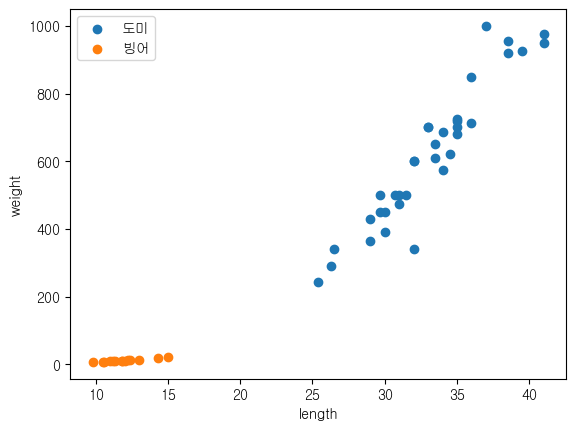

In [164]:
# 데이터 분포 확인 (산점도)
plt.scatter(bream_length, bream_weight, label='도미')
plt.scatter(smelt_length, smelt_weight, label='빙어')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()


##### 데이터 전처리
- 모델이 원하는 형태로 데이터 가공
    - 입력 : [길이, 무게] 2차원 배열
    - 결과(정답) : 도미 or 빙어 -> 1,0으로 구성된 1차원 배열

In [165]:
fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight
len(fish_weight), len(fish_length)

# 훈련 입력 데이터
train_input = []
# print(list(zip(fish_length, fish_weight)))
for l, w in zip(fish_length, fish_weight):
    train_input.append([l, w])

# 훈련 정답 데이터
train_label = [1] * len(bream_length) + [0] * len(smelt_length)


##### K-최근접 이웃 분류 모델

In [166]:
from sklearn.neighbors import KNeighborsClassifier

In [167]:
kn = KNeighborsClassifier()

# fit(훈련/학습) - score(평가) - predict(예측)
# 최근접 이웃 모델의 훈련은 별도의 연산 없이 모델이 데이터를 로드하면 끝
kn.fit(train_input, train_label)   # 입력 데이터, 정답 데이터
kn.score(train_input, train_label) # 100%
kn.predict([[30, 500], [10, 5]])   # length, weight


array([1, 0])

In [168]:
# 최근접 이웃 모델의 작동 원리
# - 주어진 데이터와 가장 가까운 k개의 이웃을 찾고, 이웃 데이터를 이용해 예측
# - distances : 모델 데이터포인트와의 거리 (유클리드 거리 측정 방식식)
# - index : 모델 데이터포인트의 인덱스스
# distances, index = kn.kneighbors([[10, 5]])
distances, index = kn.kneighbors([[30, 500]])
print(distances)
print(index)

print(np.array(train_input)[index])
print(np.array(train_label)[index])

[[ 0.3         0.7         1.          1.5        25.01999201]]
[[ 6  9 11 12 10]]
[[[ 29.7 500. ]
  [ 30.7 500. ]
  [ 31.  500. ]
  [ 31.5 500. ]
  [ 31.  475. ]]]
[[1 1 1 1 1]]


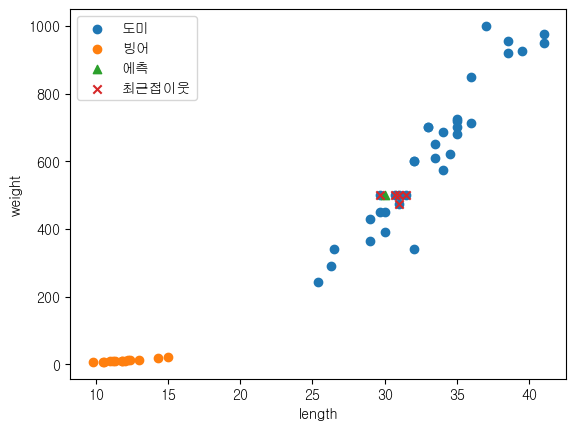

In [169]:
train_input = np.array(train_input)

# 데이터 분포 확인 (산점도)
plt.scatter(bream_length, bream_weight, label='도미')
plt.scatter(smelt_length, smelt_weight, label='빙어')
plt.scatter(30, 500, label='에측', marker='^')
plt.scatter(train_input[index, 0], train_input[index, 1], label='최근접이웃', marker='x') 
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [170]:
# K 개수 변경
kn49 = KNeighborsClassifier(n_neighbors=49)

kn49.fit(train_input, train_label)
kn49.score(train_input, train_label)

0.7142857142857143

In [171]:
35 / 49  # 도미 개수 / 전체 개수

0.7142857142857143

##### 훈련 데이터 - 테스트 데이터 분리

In [172]:
fish_input = []
for l, w in zip(fish_length, fish_weight):
    fish_input.append([l, w])

fish_label = [1] * len(bream_length) + [0] * len(smelt_length)

In [173]:
# sampling 편향 : 데이터가 한쪽으로 치우친 현상
# train 데이터는 전부 다 도미, test 데이터는 전부 다 빙어 
train_input = fish_input[:35]
train_label = fish_label[:35] # 1

test_input = fish_input[35:]
test_label = fish_label[35:] # 0

kn = KNeighborsClassifier()
kn.fit(train_input, train_label)
kn.score(test_input, test_label)

0.0

In [174]:
from sklearn.model_selection import train_test_split

# stratify 속성 의미 / random_state 42는 통상적으로 시용
train_input, test_input, train_label, test_label = train_test_split(fish_input, fish_label, test_size=0.3, stratify=fish_label, random_state=42)

train_input, test_input, train_label, test_label
sum(train_label), sum(test_label)


(24, 11)

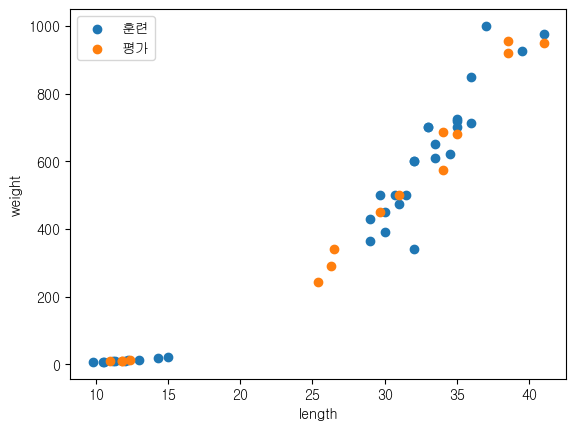

In [175]:
train_input = np.array(train_input)
test_input = np.array(test_input)

# 데이터 분포 확인 (산점도)
plt.scatter(train_input[:, 0], train_input[:, 1], label='훈련')
plt.scatter(test_input[:, 0], test_input[:, 1], label='평가')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [176]:
kn.fit(train_input, train_label)
kn.score(test_input, test_label)

1.0

##### 정규화
- 데이터포인트의 값의 범위를 재정의하는 것
    - StandardScalar
    - MinMaxScalar

In [177]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_label)
kn.score(test_input, test_label)

predict_input = [24, 150]
kn.predict([predict_input]) # 배치 차원으로 확장해서 넘겨줌

array([0])

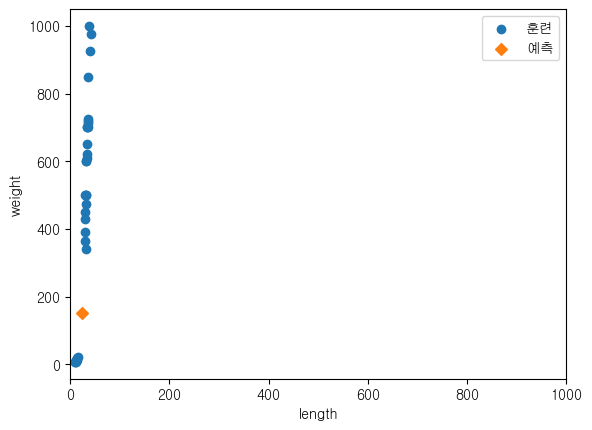

In [178]:
# train_input = np.array(train_input)
# predict_input = np.array(train_input)


# 데이터 분포 확인 (산점도)
plt.scatter(train_input[:, 0], train_input[:, 1], label='훈련')
# plt.scatter(test_input[:, 0], test_input[:, 1], label='평가')
plt.scatter(predict_input[0], predict_input[1], label='예측', marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.xlim((0, 1000))
plt.legend()
plt.show()

In [182]:
distances, index = kn.kneighbors([predict_input])
np.array(train_label)[index]

array([[0, 0, 0, 0, 0]])

##### 표준 점수 (Z-Score)
- 평균에서 얼마나 떨어져 있는지를 표준편차 단위로 계산한 값
$$
    표준 점수 = \frac{데이터포인트 - 평균}{표준편차}
$$

In [183]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
mean, std

(array([ 27.02352941, 445.60294118]), array([ 10.0816099 , 319.21122132]))

In [184]:
train_scaled = (train_input - mean) / std
train_scaled

array([[-1.4703534 , -1.35773091],
       [ 0.49361864,  0.48368306],
       [ 0.74159491,  0.54633749],
       [ 0.36467098,  0.17041086],
       [ 0.49361864,  0.48368306],
       [ 0.79119016,  0.85960969],
       [-1.55962486, -1.36869543],
       [ 0.89038067,  0.84081336],
       [ 0.19604712, -0.04887968],
       [-1.56954391, -1.36524944],
       [ 0.26548048,  0.17041086],
       [-1.4901915 , -1.36524944],
       [ 0.39442813,  0.09209281],
       [ 0.98957118,  1.73677184],
       [ 0.19604712, -0.25877205],
       [ 0.59280915,  0.79695525],
       [-1.26205334, -1.33423549],
       [ 0.44402339,  0.17041086],
       [ 1.23754745,  1.50181769],
       [-1.70841062, -1.37496088],
       [ 0.89038067,  1.26686354],
       [-1.63897726, -1.3724547 ],
       [ 0.6424044 ,  0.51501027],
       [-1.62905821, -1.37402106],
       [ 0.79119016,  0.79695525],
       [ 0.79119016,  0.8752733 ],
       [-1.391001  , -1.35773091],
       [ 0.29523763,  0.01377476],
       [ 0.59280915,

In [185]:
test_scaled = (test_input - mean) / std
test_scaled

array([[-1.58938201, -1.36556271],
       [-1.51002961, -1.36493617],
       [ 1.13835694,  1.59579935],
       [ 0.79119016,  0.73430081],
       [ 0.69199966,  0.40536501],
       [-1.4505153 , -1.35397164],
       [-0.07176725, -0.48746075],
       [ 1.38633321,  1.58013574],
       [-0.16103871, -0.6378314 ],
       [ 0.69199966,  0.74996442],
       [ 0.39442813,  0.17041086],
       [ 1.13835694,  1.48615408],
       [ 0.26548048,  0.01377476],
       [-1.51002961, -1.3646229 ],
       [-0.05192915, -0.33082465]])

In [186]:
kn.fit(train_scaled, train_label)
kn.score(test_scaled, test_label)

1.0

In [187]:
# 훈련, 테스트, 예측 데이터 모두 같은 스케일링을 적용해야 함함
predict_scaled = (predict_input - mean) / std
predict_scaled

array([-0.29990542, -0.92604182])

In [189]:
kn.predict([predict_input])

array([1])

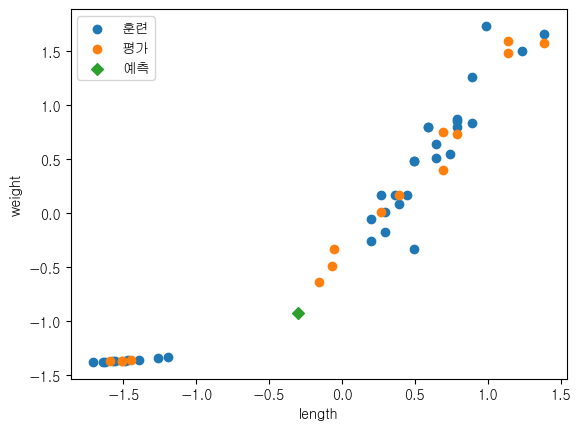

In [194]:
# 데이터 분포 확인 (산점도)
plt.scatter(train_scaled[:, 0], train_scaled[:, 1], label='훈련')
plt.scatter(test_scaled[:, 0], test_scaled[:, 1], label='평가')
plt.scatter(predict_scaled[0], predict_scaled[1], label='예측', marker='D')
plt.xlabel('length')
plt.ylabel('weight')
# plt.xlim((0, 1000))
plt.legend()
plt.show()

In [195]:
# StandardScalar
from sklearn.preprocessing import StandardScaler
std_scalar = StandardScaler()
train_scaled = std_scalar.fit_transform(train_input)
train_scaled

array([[-1.4703534 , -1.35773091],
       [ 0.49361864,  0.48368306],
       [ 0.74159491,  0.54633749],
       [ 0.36467098,  0.17041086],
       [ 0.49361864,  0.48368306],
       [ 0.79119016,  0.85960969],
       [-1.55962486, -1.36869543],
       [ 0.89038067,  0.84081336],
       [ 0.19604712, -0.04887968],
       [-1.56954391, -1.36524944],
       [ 0.26548048,  0.17041086],
       [-1.4901915 , -1.36524944],
       [ 0.39442813,  0.09209281],
       [ 0.98957118,  1.73677184],
       [ 0.19604712, -0.25877205],
       [ 0.59280915,  0.79695525],
       [-1.26205334, -1.33423549],
       [ 0.44402339,  0.17041086],
       [ 1.23754745,  1.50181769],
       [-1.70841062, -1.37496088],
       [ 0.89038067,  1.26686354],
       [-1.63897726, -1.3724547 ],
       [ 0.6424044 ,  0.51501027],
       [-1.62905821, -1.37402106],
       [ 0.79119016,  0.79695525],
       [ 0.79119016,  0.8752733 ],
       [-1.391001  , -1.35773091],
       [ 0.29523763,  0.01377476],
       [ 0.59280915,

##### 생선 다중분류

In [196]:
df = pd.read_csv('./data/fish.csv')
df['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [113]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [115]:
df.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


##### 데이터 정제

In [120]:
df[df['Weight'] == 0].index

Index([40], dtype='int64')

In [121]:
df = df.drop(40).reset_index(drop=True)
df.describe()

,Weight,Length,Diagonal,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,28.465823,31.280380,8.986790,4.424232
std,357.697796,10.731707,11.627605,4.295191,1.689010
min,5.900000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,21.000000,23.200000,5.940600,3.398650
50%,281.500000,27.400000,29.700000,7.789000,4.277050
75%,650.000000,35.750000,39.675000,12.371850,5.586750
max,1650.000000,63.400000,68.000000,18.957000,8.142000


##### 데이터 전처리
- 훈련 데이터의 규격 : input + label (numpy ndarray)
- 훈련 데이터/테스트(평가) 데이터 분리
- 정규화 (컬럼값 사이의 차이를 완화)

In [125]:
df.describe()

,Weight,Length,Diagonal,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,28.465823,31.280380,8.986790,4.424232
std,357.697796,10.731707,11.627605,4.295191,1.689010
min,5.900000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,21.000000,23.200000,5.940600,3.398650
50%,281.500000,27.400000,29.700000,7.789000,4.277050
75%,650.000000,35.750000,39.675000,12.371850,5.586750
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [127]:
# 입력-라벨 데이터 분리
fish_input = df[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_label = df['Species'].to_numpy()

fish_input.shape, fish_label.shape

((158, 5), (158,))

In [128]:
# 훈련-테스트 데이터 분리
train_input, test_input, train_label, test_label = train_test_split(fish_input, fish_label, test_size=0.1, random_state=42)

train_input.shape, test_input.shape, train_label.shape, test_label.shape

((142, 5), (16, 5), (142,), (16,))

In [129]:
# 정규화
StandardScaler = StandardScaler()
StandardScaler.fit(train_input)    # 훈련 데이터 기준 평균/표준편차 작업
train_scaled = StandardScaler.transform(train_input) # 정규화 반영 -> 훈련 데이터
test_scaled = StandardScaler.transform(test_input)   # 정규화 반영 -> 테스트 데이터

##### 훈련

In [148]:
kn = KNeighborsClassifier(n_neighbors=7)
kn.fit(train_scaled, train_label)

KNeighborsClassifier(n_neighbors=7)

In [149]:
kn._fit_X

array([[ 1.97883576,  1.28077618,  1.17218278,  0.93942578,  1.43711616],
       [ 0.45350113,  0.58491523,  0.47631458,  0.33276473,  1.15733506],
       [-0.68489199, -0.48207156, -0.55460127, -0.86877569, -0.44926819],
       [-0.71293123, -0.69546891, -0.66628382, -0.07718521, -0.64218857],
       [-1.07744135, -1.5212239 , -1.53397133, -1.58535932, -1.81192838],
       [ 0.60491302,  0.49213377,  0.65672486,  1.61503589,  0.4279494 ],
       [ 0.29648139,  0.30657085,  0.46772362,  1.16814299, -0.01758265],
       [ 0.29648139,  0.23234568,  0.45054169,  1.27961579,  0.32648585],
       [ 1.57226679,  0.95604107,  1.12063699,  2.1995884 ,  1.10177445],
       [-0.79704895, -0.66763447, -0.72642058, -0.75572881, -0.49057502],
       [-0.29234264, -0.20372718, -0.15082589,  0.00371247,  0.05735144],
       [ 1.55824717,  2.18075633,  2.07423415,  0.01549415,  1.03149465],
       [ 1.69844337,  1.41994837,  1.2924563 ,  0.89263296,  2.17807936],
       [-1.08585312, -1.63256165, -1.6

In [150]:
kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

##### 평가

In [151]:
kn.score(test_scaled, test_label)

0.625

##### 다중분류 작동 방식
- 다중분류 클래스 값의 크기와 같은 배열 형태로 결과를 도출

In [154]:
# 예측 Prediction
kn.predict(test_scaled[5:10])

array(['Bream', 'Roach', 'Roach', 'Roach', 'Pike'], dtype=object)

In [155]:
# 정답 True Label
test_label[5:10]

array(['Bream', 'Perch', 'Perch', 'Perch', 'Pike'], dtype=object)

In [156]:
# predict_proba 예측 확률 (리스트에서 확률값이 높은 값을 도출) => 결국에는 해당 과정을 보여줌줌
kn.predict_proba(test_scaled[5:10])

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.42857143, 0.        , 0.57142857,
        0.        , 0.        ],
       [0.        , 0.        , 0.28571429, 0.        , 0.71428571,
        0.        , 0.        ],
       [0.        , 0.        , 0.28571429, 0.        , 0.71428571,
        0.        , 0.        ],
       [0.        , 0.        , 0.42857143, 0.57142857, 0.        ,
        0.        , 0.        ]])

In [157]:
# n_neighbors 7로 설정하여 7개 반환
distance, index = kn.kneighbors(test_scaled[7:8])
distance, index

(array([[0.19718844, 0.19741724, 0.23533931, 0.27970693, 0.29358438,
         0.29858608, 0.30654864]]),
 array([[ 76, 118, 115,  87,  77,  67,  54]]))

In [158]:
train_label[index]

array([['Perch', 'Roach', 'Roach', 'Roach', 'Perch', 'Roach', 'Roach']],
      dtype=object)